In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Line	Plots

In [2]:
s = pd.Series(np.random.randn(10).cumsum(), index=np.arange(0, 100, 10))

In [3]:
%matplotlib inline

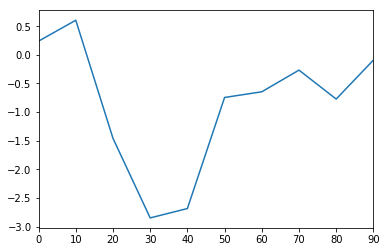

In [4]:
s.plot()

In [5]:
# for dataframe

df = pd.DataFrame(np.random.randn(10, 4).cumsum(0),
                  columns='A B C D'.split(),
                  index=np.arange(0, 100, 10))

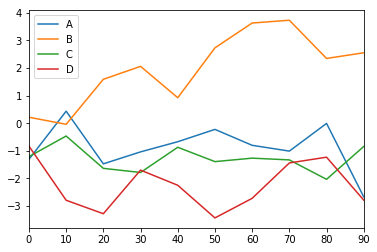

In [6]:
df.plot()

### Bar	Plots

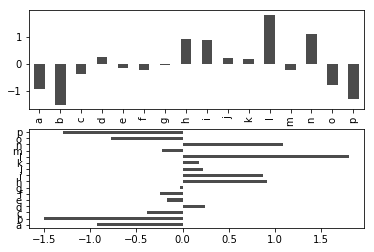

In [7]:
fig, axes = plt.subplots(2,1)
data = pd.Series(np.random.randn(16), index=list('abcdefghijklmnop'))
data.plot.bar(ax = axes[0], color='k', alpha=0.7)
data.plot.barh(ax = axes[1], color='k', alpha=0.7)

In [8]:
# for dataframe

df = pd.DataFrame(np.random.randn(6,4),
                  index='one two three four five six'.split(),
                  columns=pd.Index('A B C D'.split(), name='Genus'))

In [9]:
df

Genus,A,B,C,D
one,0.613320,1.176387,2.790763,0.169631
two,-0.717735,0.955476,0.851179,0.474119
three,-0.272235,0.394972,-1.076218,0.062952
four,-0.629542,-2.052672,-1.642467,0.831793
five,1.619940,0.522652,-0.438084,-0.402521
six,1.052882,-0.491823,-0.700871,-0.477625


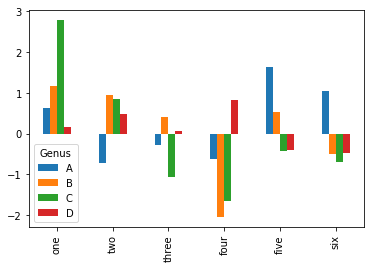

In [10]:
df.plot.bar()

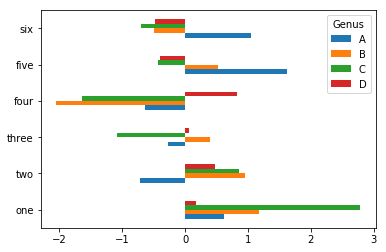

In [11]:
df.plot.barh()

In [12]:
tips = pd.read_csv('tips.csv')

In [13]:
party_counts = pd.crosstab(tips['day'], tips['size'])

In [14]:
party_counts

size,1,2,3,4,5,6
day,,,,,,
Fri,1,16,1,1,0,0
Sat,2,53,18,13,1,0
Sun,0,39,15,18,3,1
Thur,1,48,4,5,1,3


In [15]:
party_counts = party_counts.loc[:, 2:5]

In [16]:
party_counts

size,2,3,4,5
day,,,,
Fri,16,1,1,0
Sat,53,18,13,1
Sun,39,15,18,3
Thur,48,4,5,1


In [17]:
party_pcts = party_counts.div(party_counts.sum(1), axis=0)

In [18]:
party_pcts

size,2,3,4,5
day,,,,
Fri,0.888889,0.055556,0.055556,0.000000
Sat,0.623529,0.211765,0.152941,0.011765
Sun,0.520000,0.200000,0.240000,0.040000
Thur,0.827586,0.068966,0.086207,0.017241


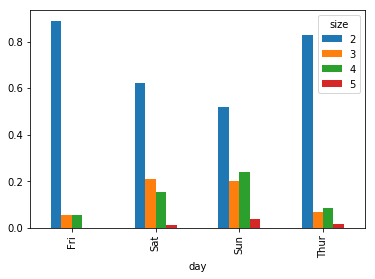

In [19]:
party_pcts.plot.bar()

In [20]:
# with seaborn 

import seaborn as sns

In [21]:
tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip'])

In [22]:
tips.head()

,total_bill,tip,smoker,day,time,size,tip_pct
0,16.99,1.01,No,Sun,Dinner,2,0.063204
1,10.34,1.66,No,Sun,Dinner,3,0.191244
2,21.01,3.50,No,Sun,Dinner,3,0.199886
3,23.68,3.31,No,Sun,Dinner,2,0.162494
4,24.59,3.61,No,Sun,Dinner,4,0.172069


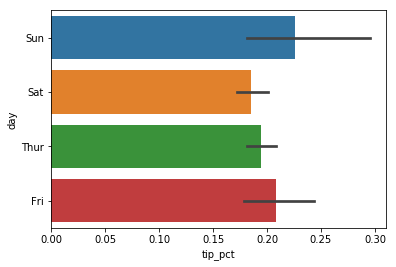

In [23]:
sns.barplot(x='tip_pct', y='day', data=tips, orient='h')

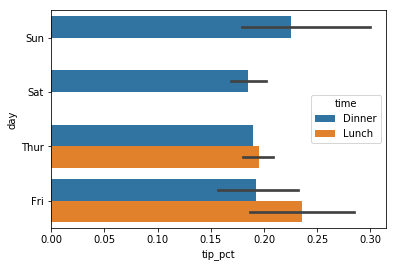

In [25]:
sns.barplot(x='tip_pct', y='day', hue='time', data=tips, orient='h')

### Histograms	and	Density	Plots

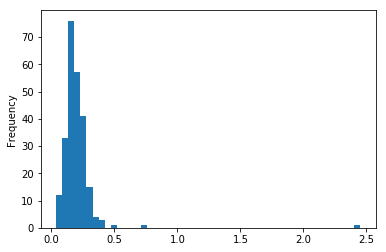

In [28]:
tips['tip_pct'].plot.hist(bins=50)

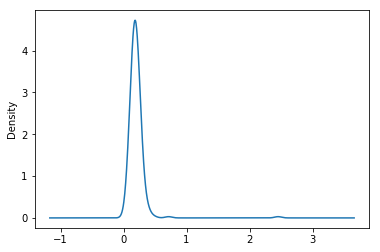

In [29]:
tips['tip_pct'].plot.density()

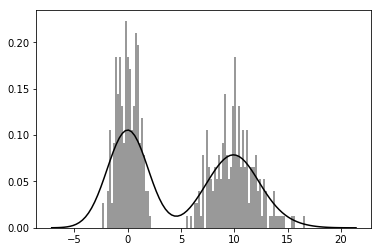

In [30]:
# hist and density with seaborn

comp1 = np.random.normal(0, 1, size=200)
comp2 = np.random.normal(10, 2, size=200)
values = pd.Series(np.concatenate([comp1, comp2]))

sns.distplot(values, bins=100, color='k')

In [31]:
np.random.normal?

### Scatter	or	Point	Plots

In [32]:
macro = pd.read_csv('macrodata.csv')

In [33]:
data = macro['cpi m1 tbilrate unemp'.split()]

In [34]:
trans_data = np.log(data).diff().dropna()

In [35]:
trans_data.head()

,cpi,m1,tbilrate,unemp
1,0.005849,0.014215,0.088193,-0.128617
2,0.006838,-0.008505,0.215321,0.038466
3,0.000681,-0.003565,0.125317,0.055060
4,0.005772,-0.002861,-0.212805,-0.074108
5,0.000338,0.004289,-0.266946,0.000000


In [36]:
trans_data.tail()

,cpi,m1,tbilrate,unemp
198,-0.007904,0.045361,-0.396881,0.105361
199,-0.021979,0.066753,-2.277267,0.139762
200,0.002340,0.010286,0.606136,0.160343
201,0.008419,0.037461,-0.200671,0.127339
202,0.008894,0.012202,-0.405465,0.042560


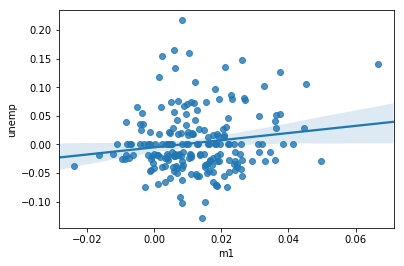

In [38]:
sns.regplot('m1', 'unemp', data=trans_data)

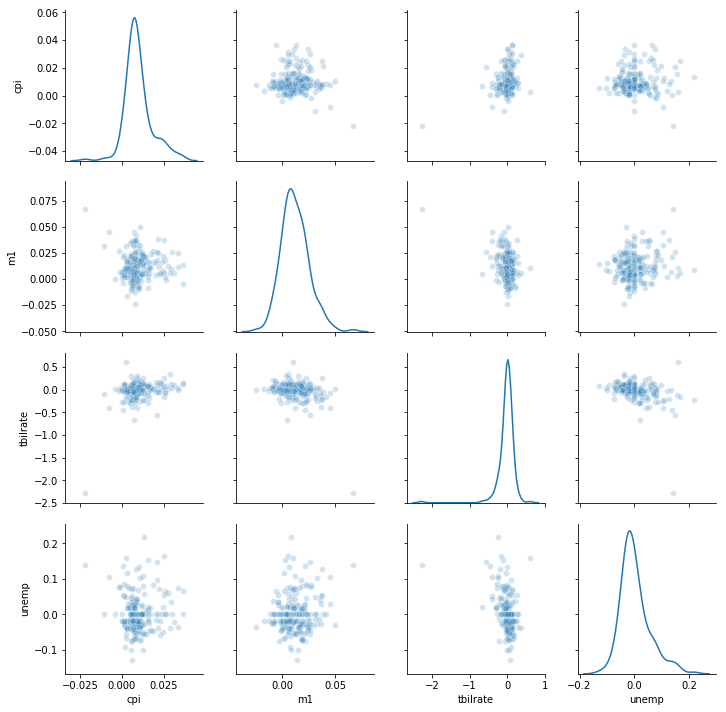

In [39]:
sns.pairplot(trans_data, diag_kind='kde', plot_kws={'alpha': 0.2})

### Facet	Grids	and	Categorical	Data

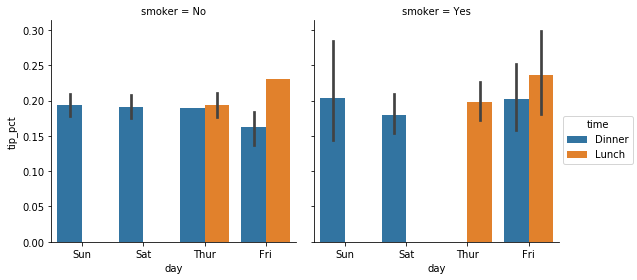

In [41]:
sns.factorplot(x='day', y='tip_pct', hue='time', col='smoker', kind='bar', data=tips[tips.tip_pct<1])